<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Lobster; background-color:#5755FE; overflow:hidden"><b> Winged Wonders: A Deep Learning Approach to Butterfly Species Identification 🦋 </b></div>

`Author:` [Phuong Phan](https://github.com/FahadUrRehman07)\
`Date:` 14.July.2024\
`Dataset:` [🐛 Butterfly & Moths Image Classification 100 species](https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species/code)

### `INSPIRATION OF THE PROJECT`

> The fascinating world of butterflies, with over 20,000 known species, has long been a subject of interest for entomologists and naturalists alike. However, accurate identification of these delicate creatures remains a significant challenge, hindering our understanding of their behavior, habitat, and conservation. This project embarks on a journey to develop a machine learning model capable of identifying butterfly species using image data, leveraging the power of computer vision and deep learning to revolutionize the field of entomology.


![butterfly](https://pollinations.ai/p/butterfly)

`Problem Statement`

> Manual identification of butterfly species is a time-consuming and expertise-dependent process, prone to errors and inconsistencies.

> The lack of an efficient and accurate identification system hinders the study of butterfly populations, habitats, and behavior, ultimately affecting conservation efforts.

>  An automated system for butterfly species identification can have a profound impact on our understanding of these insects and their role in ecosystems.

`About Dataset`
    This comprehensive dataset, comprising over 10,000 images of butterflies, captures the unique characteristics of 100 different species. The images were collected from various sources, including field observations, museum collections, and online repositories. To ensure data quality and diversity, the dataset was augmented using techniques such as rotation, flipping, and color jittering. This robust dataset provides an ideal foundation for developing and validating high-performance deep learning models for butterfly species identification.

### `Methodology`

> **Data Augmentation**: Apply random transformations to the images to artificially increase the size of the training set using TF-keras pre-processing layers.
> 
> **Evaluation**: Performance test accuracy and loss on the test dataset. Visualizing curves over epochs using matplotlib to identify potential overfitting or underfitting issues.
>
> **Fine-tuning**: MobileNetV3 model is specifically fine-tuned further by unfreezing the weights and training it on the augmented training data.
> 
> **Hyperparameter Tuning**: The code defines a new model architecture with a custom classification head on top of a pre-trained base model, and compiles it with Adam optimizer and sparse categorical cross-entropy loss.
> 
> **Prediction**: Maded on a random sample of images from the validation set. Incorrect predictions are also identified and visualized.

<div style="font-family: 'Bodoni Moda SC', cursive;text-align: center; background-color: #5755FE; font-size: 150%; color: white; padding: 14px; border-radius: 14px">Installing Required Libraries</div>

In [ ]:
! pip install -q kaggle
! kaggle datasets download -d gpiosenka/butterfly-images40-species

In [8]:
import shutil
shutil.unpack_archive('butterfly-images40-species.zip', '.', 'zip')

In [81]:
import warnings
warnings.filterwarnings('ignore')
## Data ##
import numpy as np
import pandas as pd
import os
import sys
import json
import pathlib

## Image ##
#import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image


## Tensorflow ##
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, UpSampling2D,\
                                     Dropout, Flatten, Reshape, BatchNormalization, RandomFlip, RandomRotation, Rescaling, Resizing,\
                                       RandomContrast, GaussianNoise, RandomCrop, Input, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.utils import image_dataset_from_directory

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Javascript, Image, YouTubeVideo

from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow.keras.layers as tfl
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#5755FE; overflow:hidden"><b> Dataset Content  </b></div>

In [22]:
cwd = os.path.abspath('.')
cwd

'C:\\Users\\tufga\\Downloads\\Projects\\__\\Projects'

In [53]:
PATH = cwd

In [55]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
EPOCHS = 50
CHANNELS = 3

train_dir = os.path.join(PATH, 'train')
validate_dir = os.path.join(PATH, 'valid')
test_dir = os.path.join(PATH, 'test')

trainds = image_dataset_from_directory(train_dir, shuffle = True,
                                       image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE)

testds = image_dataset_from_directory(test_dir, shuffle = True,
                                      image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                      batch_size = BATCH_SIZE)

valds = image_dataset_from_directory(validate_dir, shuffle = True,
                                     image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                     batch_size = BATCH_SIZE)


Found 12594 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [58]:
# Iterate over a single batch
for images, labels in trainds.take(1):
    print("Image shape:", images.shape)        
    print("Label shape:", labels.shape)        

class_names = trainds.class_names
n_classes = len(class_names)
print(class_names)

Image shape: (32, 224, 224, 3)
Label shape: (32,)
['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH', 'CLEARWING MOTH', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMET MOTH', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'EMPEROR GUM MOTH', 'GARDEN TIGER MOTH', 'GIANT LEOPARD MOTH', 'GLITTERING SAPPHIRE', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREEN HAIRSTREAK', 'GREY HAIRSTREAK', 'HERCULES MOTH', 'HUMMING BIRD HA

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#5755FE; overflow:hidden"><b> Data Visualizing  </b></div>

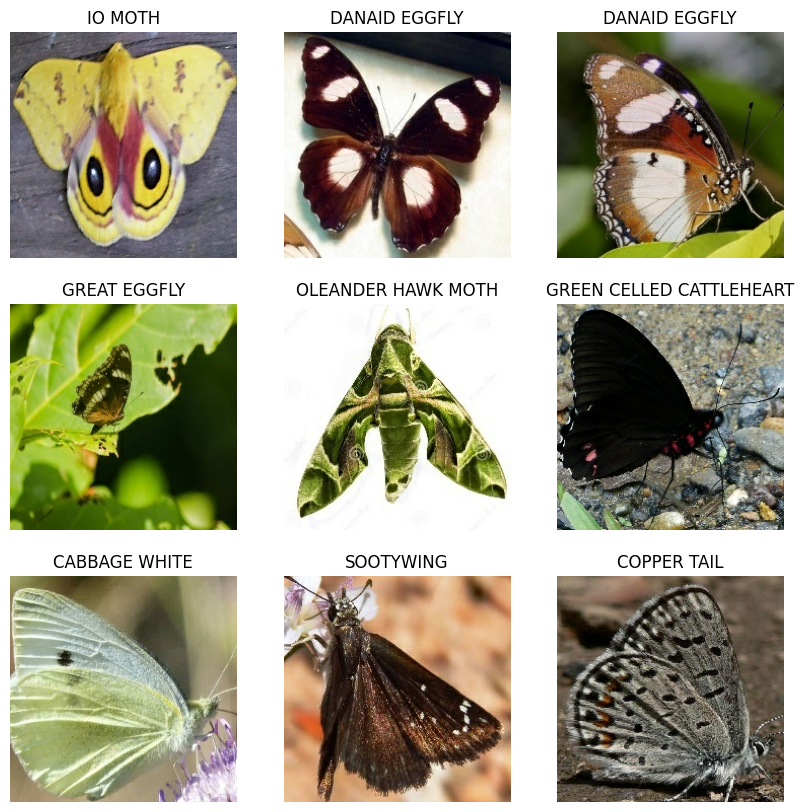

In [62]:
# Show images in dataset
plt.figure(figsize=(10, 10))
for images, labels in trainds.take(1):
    for i in range(9):<div style="font-family: 'Bodoni Moda SC', cursive; font-size: 150%; color: black; padding: 14px; border-radius: 14px">Butterfly and Moth Image Classification 🦋</div>
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

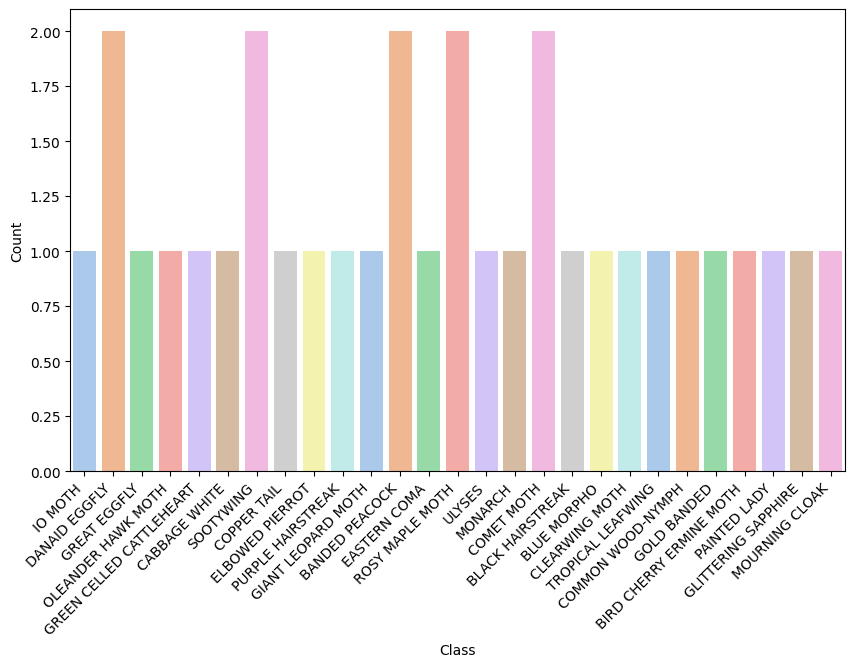

In [67]:
# Count classnames
plt.figure(figsize=(10, 6))
sns.countplot(x=[class_names[label] for label in labels], palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

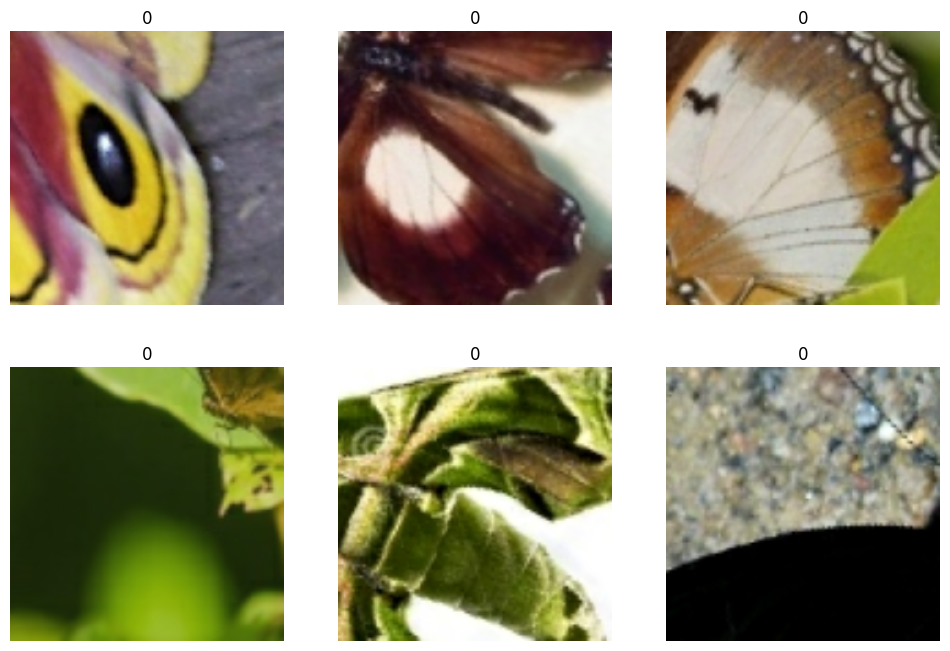

In [90]:
#Data Augmentation
data_aug = Sequential(
    [RandomFlip('horizontal'),RandomRotation(0.2),
    RandomContrast(0.2), GaussianNoise(0.1), RandomCrop(height=100, width=100) ])

data_re = Sequential(
    [Rescaling(1./255,offset = 0),Resizing(224,224)])

# Plot
# Apply data augmentation to each image in the batch
augmented_images = list(map(data_aug, images))
# Apply preprocessing to each augmented image
augmented_images = [data_re(img) for img in augmented_images]
#augmented_images, labels = trainds.next()

# Plot the augmented images
plt.figure(figsize=(12, 8))
for i in range(min(6, len(augmented_images))):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(int(np.argmax(labels[i])))
    plt.axis("off")

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#5755FE; overflow:hidden"><b> Modelling  </b></div>

# `CNN`

In [133]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
trainds = trainds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
valds = valds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
testds = testds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

from tensorflow.keras.applications import MobileNetV3Large

base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

#Data Augmentation
data_aug = Sequential(
    [RandomFlip('horizontal'),RandomRotation(0.2),
    RandomContrast(0.2), GaussianNoise(0.1), RandomCrop(height=224, width=224)])

data_re = Sequential(
    [Rescaling(1./255,offset = 0),Resizing(224,224)])

#--------------------------------------------------------------------------
inputs = Input(shape=(224, 224, 3))

x = data_aug(inputs)
x = data_re(x)                                          #preprocess_input(x)
x = base_model(x, training=False)
#--------------------------------------------------------------------------
# Add a new classification head on top
x = base_model.output                                        # Conv2D(64, MaxPool, Upsampl, Conv2D(64, MaxPool, Flatten,////Dense, Batch, Dropout, Flatten, Dense, Dense(n_classes)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(100, activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainds, epochs=4, validation_data=valds)
# Evaluate the model
test_loss, test_acc = model.evaluate(testds)
print(f'Test accuracy: {test_acc:.2f}')


Epoch 1/4
394/394 ━━━━━━━━━━━━━━━━━━━━ 242s 596ms/step - accuracy: 0.5124 - loss: 2.2340 - val_accuracy: 0.9280 - val_loss: 0.3795
Epoch 2/4
394/394 ━━━━━━━━━━━━━━━━━━━━ 236s 600ms/step - accuracy: 0.9400 - loss: 0.2687 - val_accuracy: 0.9360 - val_loss: 0.2776
Epoch 3/4
394/394 ━━━━━━━━━━━━━━━━━━━━ 271s 688ms/step - accuracy: 0.9780 - loss: 0.1230 - val_accuracy: 0.9400 - val_loss: 0.2593
Epoch 4/4
394/394 ━━━━━━━━━━━━━━━━━━━━ 249s 633ms/step - accuracy: 0.9883 - loss: 0.0682 - val_accuracy: 0.9440 - val_loss: 0.2324
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 524ms/step - accuracy: 0.9380 - loss: 0.2314
Test accuracy: 0.95


In [182]:
model = tf.keras.models.load_model('ButterFlybutterfly95.keras')

In [149]:
score = model.evaluate(testds)
print(score)
print(history.history.keys())
print(history.history['accuracy'][:4])

acc= history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

loss, accuracy = model.evaluate(testds)
print('Test accuracy :', accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 544ms/step - accuracy: 0.9396 - loss: 0.2215
[0.20448094606399536, 0.9459999799728394]
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.7189137935638428, 0.9412418603897095, 0.9754645228385925, 0.9878513813018799]
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 524ms/step - accuracy: 0.9506 - loss: 0.1998
Test accuracy : 0.9459999799728394


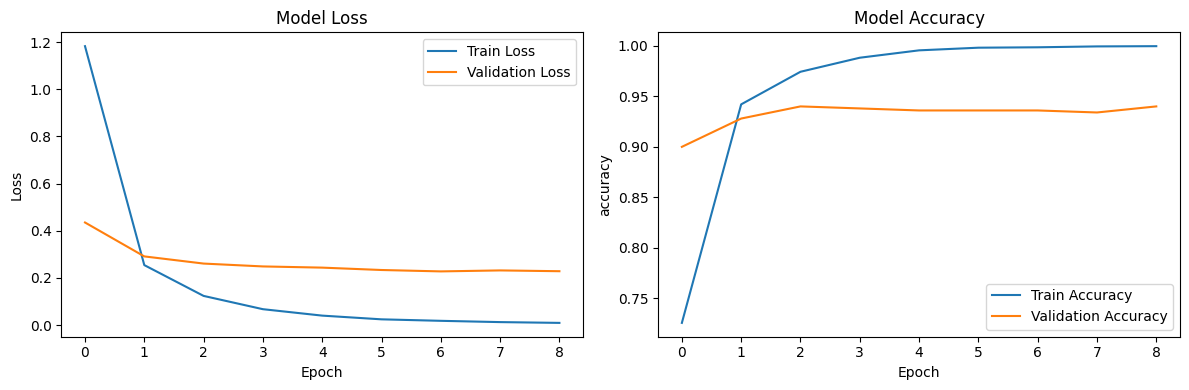

In [117]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.show()

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#5755FE; overflow:hidden"><b> Predicting  </b></div>

first image to predict
actual labels CLODIUS PARNASSIAN
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: CLODIUS PARNASSIAN


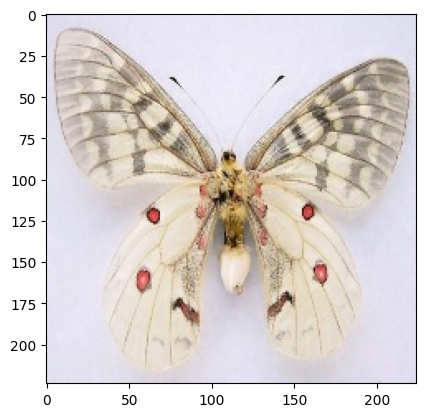

In [184]:
import numpy as np

for n, label in testds.take(1):
    first_image = n[0].numpy().astype('uint8')
    first_label = label[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual labels', class_names[first_label])

    prediction = model.predict(n)
    print("predicted label:",class_names[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


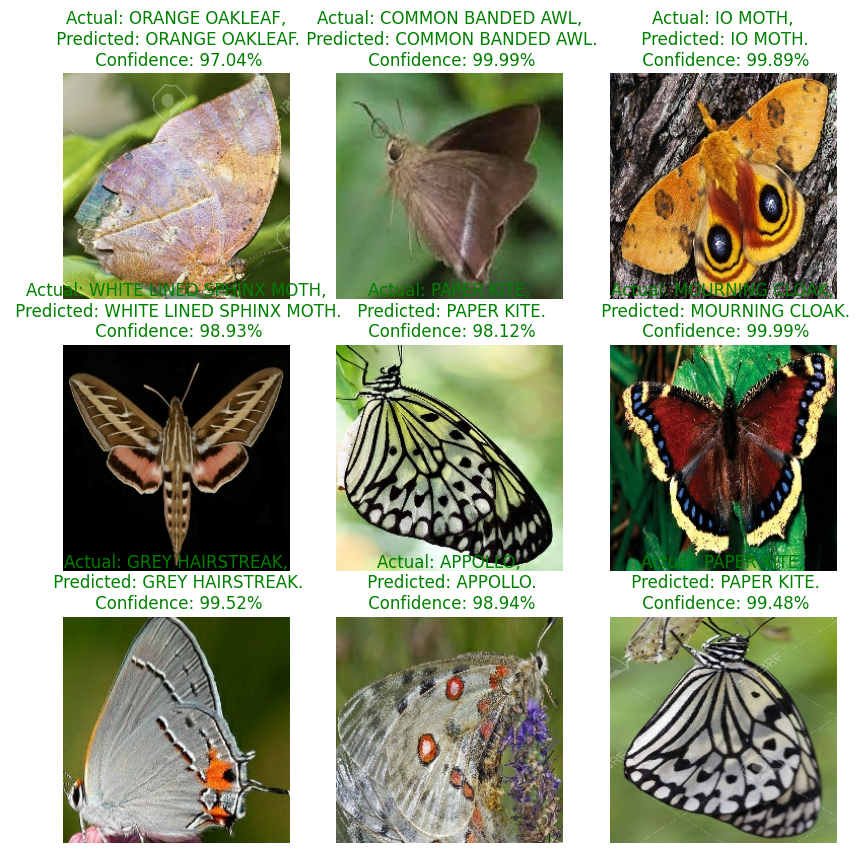

In [188]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(10, 10))
for images, labels in testds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        if predicted_class == actual_class:
            color = 'green'
        else:
            color = 'red'

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%",color=color)

        plt.axis("off")

<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>

***I hope you found it informative and engaging. If you enjoyed the content and found it helpful. Your feedback is valuable and encourages me to create more content like this in the future.***

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [6]:
from huggingface_hub import HfApi

api = HfApi()
repo_id = "PhuongPhan/ButterFly_Space"
repo_type = "space"

api.upload_folder(
    folder_path="C:/Users/tufga/Downloads/Projects/__/Projects/ButterFly",
    
    repo_id= repo_id,
    repo_type= repo_type)
